# Clustering

It refers to the task of partioning the dataset into groups, called clusters. This partion is done in a way that elements in the same cluster are similar and elements of the different clusters are different.


k-means clustering helps in coming up with k-clusters (groups) in an unlabelled dataset.

The following steps are included in the algorithm-


1.   Start with k data points (centroid)
2.   Find the distance of all the points from these centroids.
3. Allocate all to points to 1 group that are closer to a particular centroid forming k-clusters
4. Recompute the centroid for each cluster.
5. Repeat 3 and 4 till until the distance between the old clusters and new clusters is constant.


## Using k-means

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# kmeans
from sklearn.cluster import KMeans

# load digit dataset
from sklearn.datasets import load_digits

# selecting k through silhoutte score
from sklearn.metrics import silhouette_score

# Normalise through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

load the digit images:

1. 8x8 digit images with approximately 180 samples per class
2. from 10 classes it has total of 1797 images
3. each pixel has value of between 0 and 16

In [12]:
digits = load_digits()

In [13]:
?KMeans

Define the parameters of kmeans clustering in dict object

In [14]:
kmeans_kwargs = {
    "init":"random",
    "n_init":50,
    "max_iter": 500,
    "random_state": 0,
}

Lets define pipeline

In [15]:
pipe = Pipeline([('preprocess', MinMaxScaler()),
                 ("clustering", KMeans(n_clusters = 10, **kmeans_kwargs))])
pipe.fit(digits.data)

Pipeline(steps=[('preprocess', MinMaxScaler()),
                ('clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

In [ ]:
cluster_centers = pipe[-1].cluster_centers_

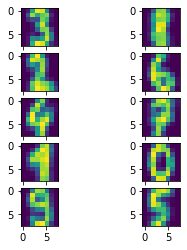

In [18]:
# dispaly the cluster centroids

fig, ax = plt.subplots(5,2, figsize = (4,4))
for i,j in zip(ax.flat, cluster_centers.reshape(10,8,8)):
  i.imshow(j)

For deciding the optimal number of clusters through elbow method and silhoutte, we will pretend that we do not know number of clusters in data and we will try to discover the optimal number of clusters through these two methods

## Elbow methods

In [20]:
# identifying the correct number of clusters

sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  sse_digit.append(kmeans.inertia_)

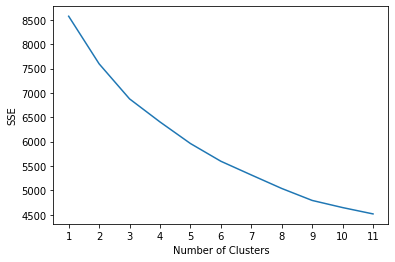

In [21]:
plt.plot(range(1,12), sse_digit)
plt.xticks(range(1,12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

slight elbow at k=9 may point to some digits may have been merged

## Silhoutte

In [27]:
sil_coef_digits = []
for k in range(2,15):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  score = silhouette_score(digits.data, kmeans.labels_)
  sil_coef_digits.append(score)

In [28]:
sil_coef_digits

[0.11824396471614179,
 0.12599334242255583,
 0.1280651660735052,
 0.13793400098759367,
 0.15159538962044927,
 0.16347156020133186,
 0.1788999322596752,
 0.189235760161635,
 0.18246646194839133,
 0.1835808986058307,
 0.18259820808368807,
 0.1852760088639787,
 0.1875415850308825]

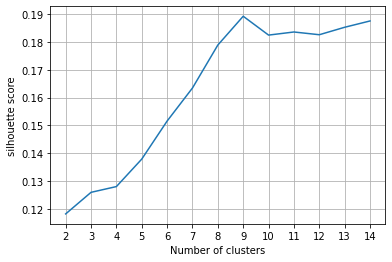

In [29]:
plt.plot(range(2,15), sil_coef_digits)
plt.xticks(range(2,15))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.grid(True)
plt.show()

In [31]:
# get the value of x for which sillhoutte coef is highest
np.argmax(sil_coef_digits)+2

9